#####Imports


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib



###Loading and Displaying

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
with open ('/content/drive/MyDrive/Churn_Modelling.csv') as file:
  data = pd.read_csv(file,sep=',')

In [7]:
# Display the first few rows of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 #### Data Preprocessing and Cleaning

In [9]:
# Check for missing values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [11]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

In [12]:
# Drop unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

####Feature Engineering

In [13]:
# Create new features
data['BalanceSalaryRatio'] = data['Balance'] / data['EstimatedSalary']

In [15]:
# Check the new features
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,BalanceSalaryRatio
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False,0.000000
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True,0.744677
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False,1.401375
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False,0.000000
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True,1.587055


####Exploratory Data Analysis (EDA)

In [16]:
# Summary statistics
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,3.878703
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,108.337260
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.747002
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.514022
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,10614.655440


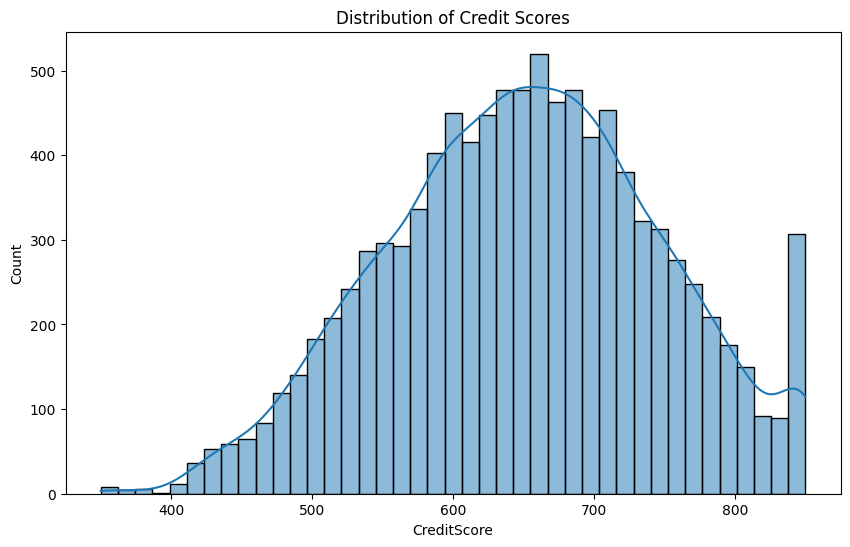

In [17]:
# Visualize distributions of key features
plt.figure(figsize=(10, 6))
sns.histplot(data['CreditScore'], kde=True)
plt.title('Distribution of Credit Scores')
plt.show()

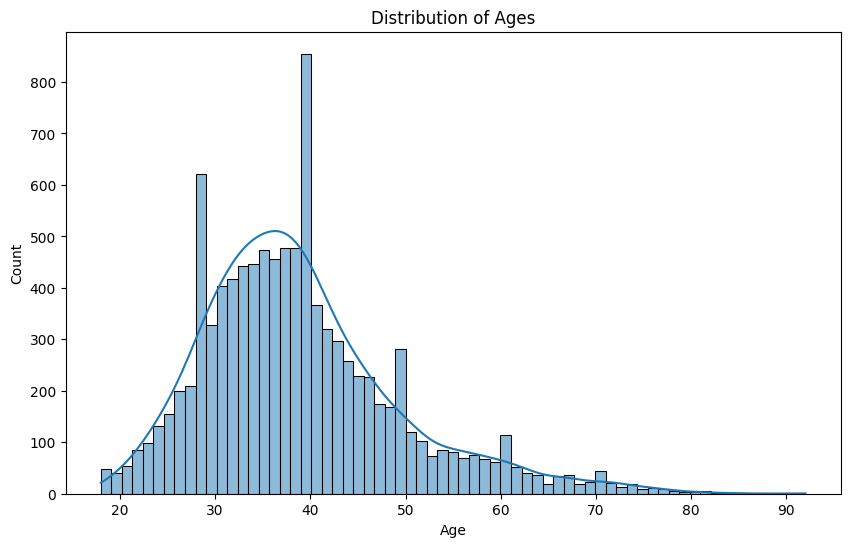

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Ages')
plt.show()

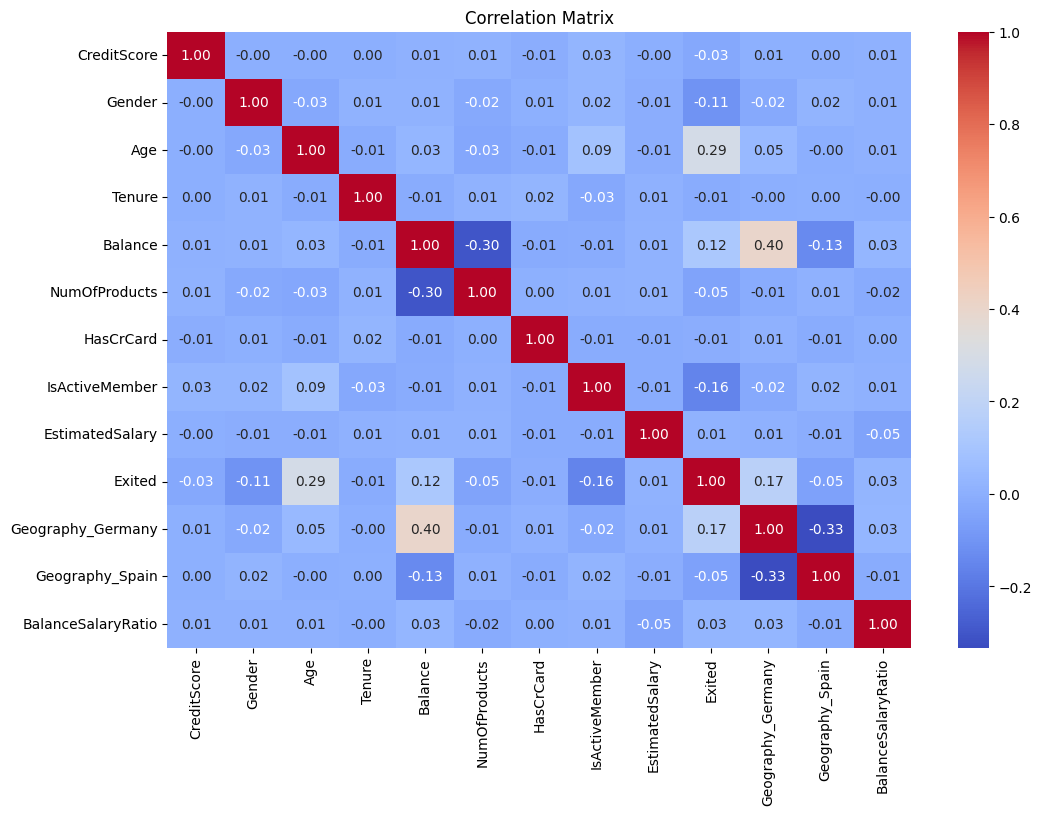

In [19]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

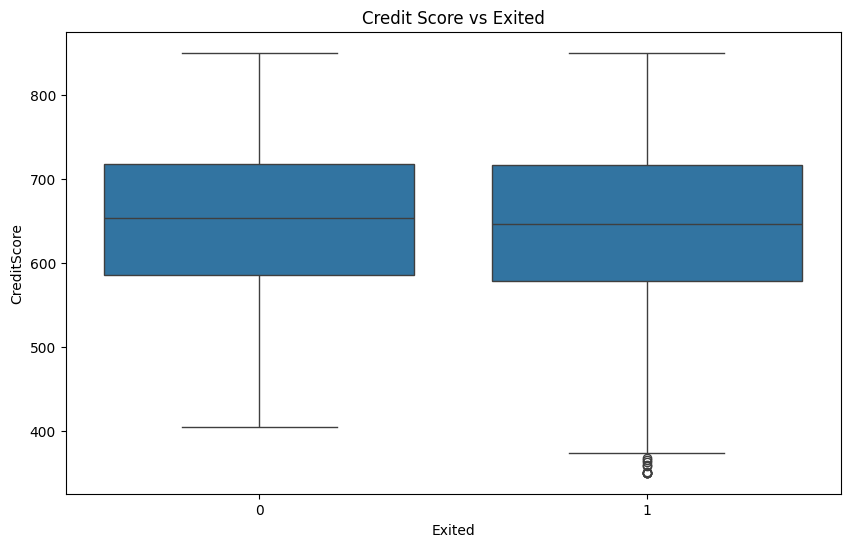

In [20]:
# Visualize the relationship between features and the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.title('Credit Score vs Exited')
plt.show()

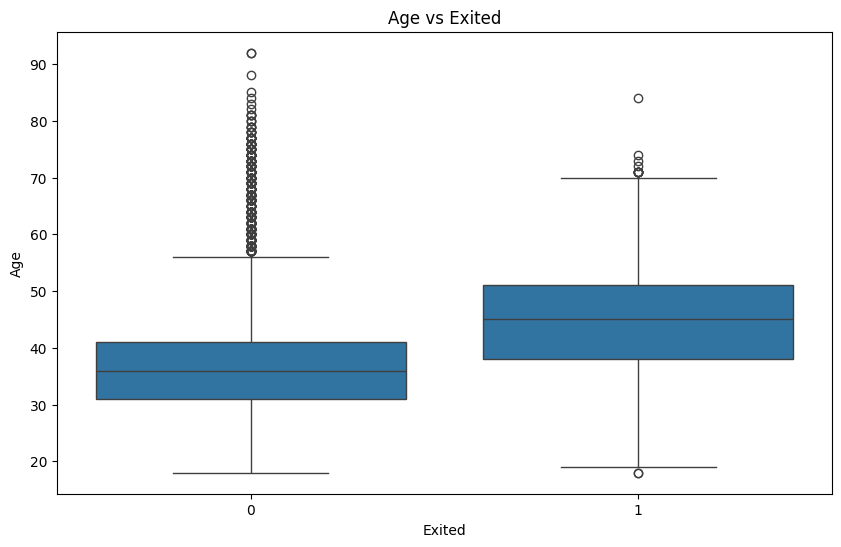

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age vs Exited')
plt.show()

#####Model Selection and Evaluation

In [22]:
# Split the data into training and testing sets
X = data.drop(columns=['Exited'])
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Initialize the models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [28]:
# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.812
[[1543   64]
 [ 312   81]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000



In [29]:
# Train and evaluate Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8695
[[1553   54]
 [ 207  186]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [30]:
# Train and evaluate Gradient Boosting
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8675
[[1544   63]
 [ 202  191]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



####Model Improvement

In [32]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [33]:
# Evaluate the best Random Forest model
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Best Random Forest Accuracy: 0.866
[[1549   58]
 [ 210  183]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [34]:
# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [35]:
# Evaluate the best Gradient Boosting model
y_pred_best_gb = best_gb.predict(X_test)
print("Best Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print(confusion_matrix(y_test, y_pred_best_gb))
print(classification_report(y_test, y_pred_best_gb))

Best Gradient Boosting Accuracy: 0.866
[[1541   66]
 [ 202  191]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



####Model Testing and Deployment

In [49]:
# Save the best model
joblib.dump(best_gb, 'best_model.pkl')

# Load the model for prediction
model = joblib.load('best_model.pkl')

# Function to predict customer churn
def predict_churn(CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography_Germany, Geography_Spain, Gender_Male):
    features = np.array([[CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography_Germany, Geography_Spain, Gender_Male,
                          Balance / EstimatedSalary]])
    features = scaler.transform(features)
    prediction = model.predict(features)
    return 'Customer will exit' if prediction == 1 else 'Customer will stay'

# Example prediction
print(predict_churn(100, 90, 3, -60000, 1, 0, 3000, 1,False,True, 0))

Customer will exit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
